In [24]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import urllib3

import feersum_nlu
from feersum_nlu.rest import ApiException

## Setup the API key and service endpoint

In [25]:
# Try to get the API key from your OS environment, else use 'YOUR_API_KEY' as the default value in the code below.
# You may use any environment variable you want, it doesn't have to be 'FEERSUM_NLU_AUTH_TOKEN'.
feersum_nlu_auth_token = os.environ.get('FEERSUM_NLU_AUTH_TOKEN', 'YOUR_API_KEY')
# print('feersum_nlu_auth_token = ', feersum_nlu_auth_token)

# Configure API key authorization: APIKeyHeader
configuration = feersum_nlu.Configuration()
configuration.api_key['AUTH_TOKEN'] = feersum_nlu_auth_token

# configuration.host = "http://127.0.0.1:8100/nlu/v2"
configuration.host = "https://nlu.dev.feersum.io:443/nlu/v2"

## Build a classifier of text utterances into intent/action labels. 
Create an intent classifier, train it up and make a prediction.

In [46]:
api_instance = feersum_nlu.IntentClassifiersApi(feersum_nlu.ApiClient(configuration))

wm_instance_name = 'feers_wm_eng'
instance_name = 'test_intent_clsfr'

create_details = feersum_nlu.IntentClassifierCreateDetails(name=instance_name, 
                                                           desc="Test intent classifier.", 
                                                           load_from_store=False)

# The training samples.
labelled_text_sample_list = []
labelled_text_sample_list.append(feersum_nlu.LabelledTextSample(text="I would like to fill in a claim form.",
                                                                label="claim"))
labelled_text_sample_list.append(feersum_nlu.LabelledTextSample(text="How do I fill in a claim form.",
                                                                label="claim"))
labelled_text_sample_list.append(feersum_nlu.LabelledTextSample(text="Please give me a claim form to fill in.",
                                                                label="claim"))


labelled_text_sample_list.append(feersum_nlu.LabelledTextSample(text="Can I get a quote on your website.",
                                                                label="quote"))
labelled_text_sample_list.append(feersum_nlu.LabelledTextSample(text="Can I get a quote online.",
                                                                label="quote"))
labelled_text_sample_list.append(feersum_nlu.LabelledTextSample(text="Can I get a quote from you.",
                                                                label="quote"))



# train_details = feersum_nlu.TrainDetails(immediate_mode=True)
train_details = feersum_nlu.TrainDetails(threshold=0.85,
                                         word_manifold=wm_instance_name,
                                         immediate_mode=True)

print()

try:
    print("Create the intent classifier:")
    api_response = api_instance.intent_classifier_create(create_details)
    print(" type(api_response)", type(api_response))
    print(" api_response", api_response)
    print()

    # print("Add training samples to the intent classifier:")
    # api_response = api_instance.intent_classifier_add_training_samples(instance_name, labelled_text_sample_list)
    # print(" type(api_response)", type(api_response))
    # print(" api_response", api_response)
    # print()

    print("Get the training samples of the intent classifier:")
    api_response = api_instance.intent_classifier_get_training_samples(instance_name)
    print(" type(api_response)", type(api_response))
    print(" api_response", api_response)
    print()

    print("Del the training samples of the intent classifier:")
    api_response = api_instance.intent_classifier_del_training_samples_all(instance_name)
    print(" type(api_response)", type(api_response))
    print(" api_response", api_response)
    print()

    print("Add training samples to the intent classifier:")
    api_response = api_instance.intent_classifier_add_training_samples(instance_name, labelled_text_sample_list)
    print(" type(api_response)", type(api_response))
    print(" api_response", api_response)
    print()

    print("Train the intent classifier:")
    api_response = api_instance.intent_classifier_train(instance_name, train_details)
    print(" type(api_response)", type(api_response))
    print(" api_response", api_response)
    print()

    # print("Get the details of all loaded intent classifiers:")
    # api_response = api_instance.intent_classifier_get_details_all()
    # print(" type(api_response)", type(api_response))
    # print(" api_response", api_response)
    # print()

    print("Get the details of specific named loaded intent classifiers:")
    api_response = api_instance.intent_classifier_get_details(instance_name)
    print(" type(api_response)", type(api_response))
    print(" api_response", api_response)
    print()
except ApiException as e:
    print("Exception when calling an intent classifier operation: %s\n" % e)
except urllib3.exceptions.MaxRetryError:
    print("Connection MaxRetryError!")


Create the intent classifier:
 type(api_response) <class 'feersum_nlu.models.intent_classifier_instance_detail.IntentClassifierInstanceDetail'>
 api_response {'cm_labels': {},
 'desc': 'Test intent classifier.',
 'id': '5e0fa2a0-816d-4d7b-8b65-4e41ecb5a274',
 'long_name': None,
 'name': 'test_intent_clsfr',
 'num_testing_samples': 0,
 'num_training_samples': 0,
 'testing_accuracy': -1.0,
 'testing_cm': {},
 'testing_f1': 0.0,
 'threshold': 1.0,
 'training_accuracy': -1.0,
 'training_cm': {},
 'training_f1': 0.0,
 'training_stamp': '',
 'validation_accuracy': -1.0,
 'validation_cm': {},
 'validation_f1': 0.0,
 'word_manifold_list': []}

Get the training samples of the intent classifier:
 type(api_response) <class 'list'>
 api_response []

Del the training samples of the intent classifier:
 type(api_response) <class 'list'>
 api_response []

Add training samples to the intent classifier:
 type(api_response) <class 'feersum_nlu.models.total_samples.TotalSamples'>
 api_response {'total_sa

In [47]:
text_input = feersum_nlu.TextInput("How do I get a quote")

try:
    print("Classify intent:")
    api_response = api_instance.intent_classifier_retrieve(instance_name, text_input)
    print(" type(api_response)", type(api_response))
    print(" api_response", api_response)
    print()
except ApiException as e:
    print("Exception when calling an intent classifier operation: %s\n" % e)
except urllib3.exceptions.MaxRetryError:
    print("Connection MaxRetryError!")

Classify intent:
 type(api_response) <class 'list'>
 api_response [{'label': 'quote', 'probability': 0.39667112515113445}]



In [48]:
tsne_settings = feersum_nlu.TsneSettings(n_components=2, perplexity=50.0, learning_rate=200)

print("Run TSNE:")
api_response = api_instance.intent_classifier_tsne(instance_name, tsne_settings)
print(" type(api_response)", type(api_response))
print(" api_response", api_response)
print()


Run TSNE:
 type(api_response) <class 'list'>
 api_response [{'label': 'claim',
 'text': 'I would like to fill in a claim form.',
 'x': 30.437639236450195,
 'y': -107.1258544921875,
 'z': 0.0}, {'label': 'quote',
 'text': 'Can I get a quote online.',
 'x': 40.419307708740234,
 'y': -69.06219482421875,
 'z': 0.0}, {'label': 'quote',
 'text': 'Can I get a quote on your website.',
 'x': 29.24079132080078,
 'y': -86.47350311279297,
 'z': 0.0}, {'label': 'claim',
 'text': 'How do I fill in a claim form.',
 'x': 9.969528198242188,
 'y': -93.99634552001953,
 'z': 0.0}, {'label': 'quote',
 'text': 'Can I get a quote from you.',
 'x': 16.131568908691406,
 'y': -70.46500396728516,
 'z': 0.0}, {'label': 'claim',
 'text': 'Please give me a claim form to fill in.',
 'x': 49.252262115478516,
 'y': -91.7239990234375,
 'z': 0.0}]



In [49]:
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt

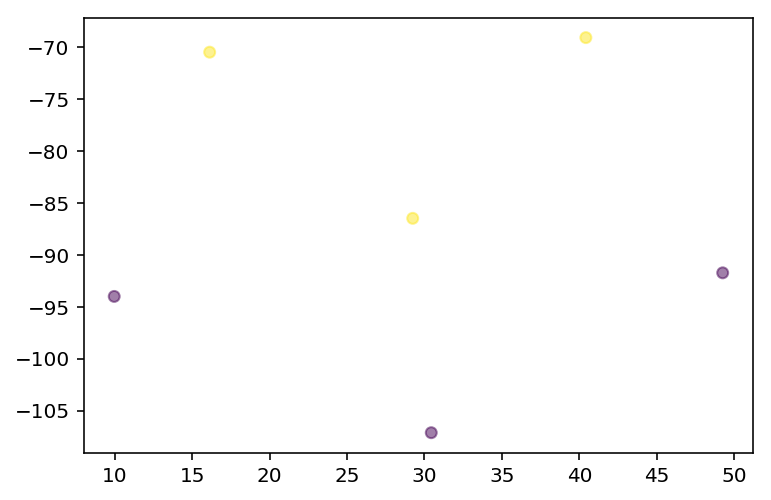

In [50]:
label_to_colour_map = {}

N = len(api_response)
x = np.zeros(N)
y = np.zeros(N)
colours = np.zeros(N)
area = np.zeros(N) + 30

for idx, sample in enumerate(api_response):
    x[idx] = sample.x
    y[idx] = sample.y
    label = sample.label
    
    c = label_to_colour_map.get(label, len(label_to_colour_map))
    label_to_colour_map[label] = c
    
    colours[idx] = c;
    

plt.scatter(x, y, s=area, c=colours, alpha=0.5)
plt.show()